In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np




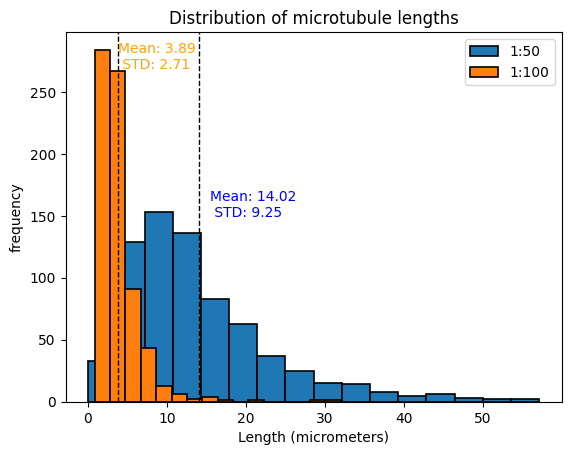

In [ ]:
df = pd.read_csv('1:50_Results.csv')
data_1To50 = df.Length

df1 = pd.read_csv('1:100_Results.csv')
data_1To100 = df1.Length

fig, ax = plt.subplots(1, 1)
plt.hist(data_1To50, bins=16, edgecolor='black', linewidth=1.2, label="1:50")
plt.hist(data_1To100, bins=16, edgecolor='black', linewidth=1.2, label="1:100")
ax.set_title("Distribution of microtubule lengths")
ax.set_ylabel("frequency")
ax.set_xlabel("Length (micrometers)")

plt.axvline(data_1To50.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(data_1To50.mean()*1.1, max_ylim*0.5, 'Mean: {:.2f}\n STD: {:.2f}'.format(data_1To50.mean(), np.std(data_1To50)), color = "blue")

plt.axvline(data_1To100.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(data_1To100.mean()*1, max_ylim*0.9, 'Mean: {:.2f} \n STD: {:.2f}'.format(data_1To100.mean(), np.std(data_1To100)), color = "orange")

plt.legend()



Text(0, 0.5, 'Distance Between Wrinkles (um)')

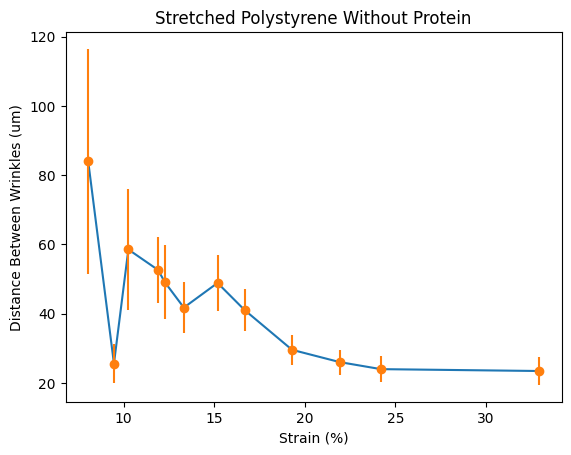

In [ ]:
strain = []
avg_wrinkle = []
std_over_rootn = []

def plot_peaks(file, threshhold = 0):
  sample1 = pd.read_csv(file)
  # sample1 = sample1[:100]
  peaks = []
  bottoms = []
  for i in range(1, len(sample1['Y'])-1):
    if sample1['Y'][i] > sample1['Y'][i+1] and sample1['Y'][i] > sample1['Y'][i-1]:
      peaks.append(i)
    if sample1['Y'][i] < sample1['Y'][i+1] and sample1['Y'][i] < sample1['Y'][i-1]:
      bottoms.append(i)

  meanY = np.mean(sample1['Y'])

  important_peaks = [i for i in peaks if sample1['Y'][i] > meanY + threshhold]

  # important_peaks = [peaks[i] for i in range(len(peaks)-1) if sample1['Y'][peaks[i]] - sample1['Y'][bottoms[i]]> threshhold]

  lengths_of_cycles = [sample1['X'][important_peaks[i]] - sample1['X'][important_peaks[i-1]] for i in range(1, len(important_peaks))]

  stretch = float(file[:2]) + float(file[3:5])/100
  strain.append(100*(stretch - 59.14)/59.14)
  avg_wrinkle.append(np.mean(lengths_of_cycles))
  std_over_rootn.append(np.std(lengths_of_cycles)/np.sqrt(len(lengths_of_cycles)))

  # plt.plot(sample1['X'], sample1['Y'])
  # plt.plot(sample1['X'][important_peaks], sample1['Y'][important_peaks])


# plot_peaks("61,42A.csv", 250)
plot_peaks("63,90A.csv", 1200)
plot_peaks("64,74A.csv", 1100)
plot_peaks("65,21A.csv", 1950)
plot_peaks("66,18A.csv", 1400)
plot_peaks("66,40A.csv", 2120)
plot_peaks("67,02A.csv", 1600)
plot_peaks("68,12A.csv", 2500)
plot_peaks("69,00A.csv", 1670)
plot_peaks("70,55A.csv", 1700)
plot_peaks("72,10A.csv", 1500)
plot_peaks("73,45A.csv", 3500)
plot_peaks("78,61A.csv", 2750)

plt.plot(strain, avg_wrinkle)
plt.errorbar(strain, avg_wrinkle, yerr = std_over_rootn, fmt ='o')
plt.title("Stretched Polystyrene Without Protein")
plt.xlabel("Strain (%)")
plt.ylabel("Distance Between Wrinkles (um)")

Below is with protein

Text(0, 0.5, 'Distance Between Wrinkles (um)')

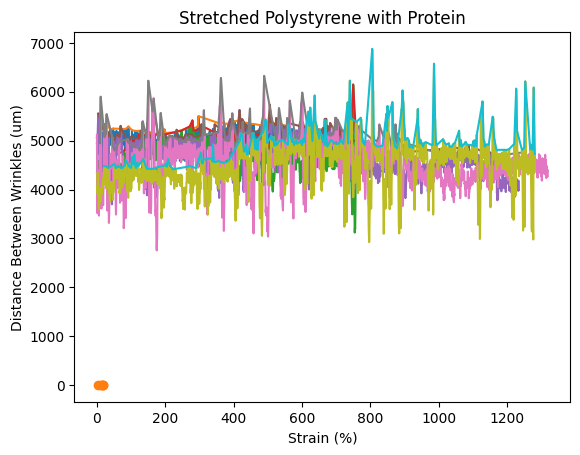

In [ ]:
strain = []
avg_wrinkle = []
std_over_rootn = []

def plot_peaks(file, threshhold = 0, window = 500):
  sample1 = pd.read_csv(file)
  # sample1 = sample1[:100]
  peaks = []
  bottoms = []
  for i in range(1, len(sample1['Y'])-1):
    if sample1['Y'][i] > sample1['Y'][i+1] and sample1['Y'][i] > sample1['Y'][i-1]:
      peaks.append(i)
    if sample1['Y'][i] < sample1['Y'][i+1] and sample1['Y'][i] < sample1['Y'][i-1]:
      bottoms.append(i)
  bottoms.append(bottoms[-1])

  important_peaks = []
  for i in peaks:
    left_window = max(i - window, 0)
    right_window = min(i+window, len(sample1['X']))
    meanY = np.mean(sample1['Y'][left_window : right_window])
    if sample1['Y'][i] > meanY + threshhold:
      important_peaks.append(i)

  lengths_of_cycles = [sample1['X'][important_peaks[i]] - sample1['X'][important_peaks[i-1]] for i in range(1, len(important_peaks))]

  stretch = float(file[:2]) + float(file[3:5])/100
  strain.append(100*(stretch - 53.35)/53.35)
  avg_wrinkle.append(np.mean(lengths_of_cycles))
  std_over_rootn.append(np.std(lengths_of_cycles)/np.sqrt(len(lengths_of_cycles)))

  plt.plot(sample1['X'], sample1['Y'])
  plt.plot(sample1['X'][important_peaks], sample1['Y'][important_peaks])

plot_peaks("55,57.csv", 200, 100)
plot_peaks("60,39A.csv", 250, 50)
plot_peaks("61,41A.csv", 300, 200)
plot_peaks("62,59.csv", 300, 200)
plot_peaks("63,18.csv", 200, 200)

plt.plot(strain, avg_wrinkle)
plt.errorbar(strain, avg_wrinkle, yerr = std_over_rootn, fmt ='o')
plt.title("Stretched Polystyrene with Protein")
plt.xlabel("Strain (%)")
plt.ylabel("Distance Between Wrinkles (um)")

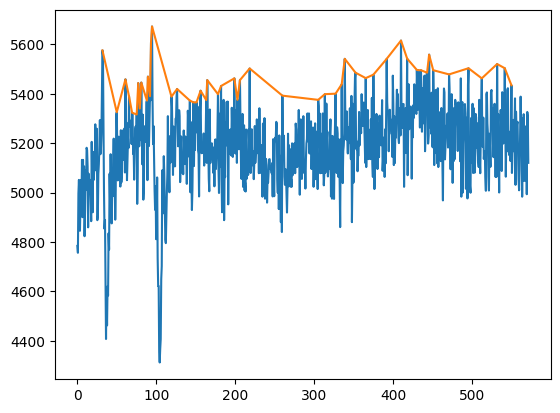

In [ ]:
plot_peaks("53,35.csv", 200, 100)

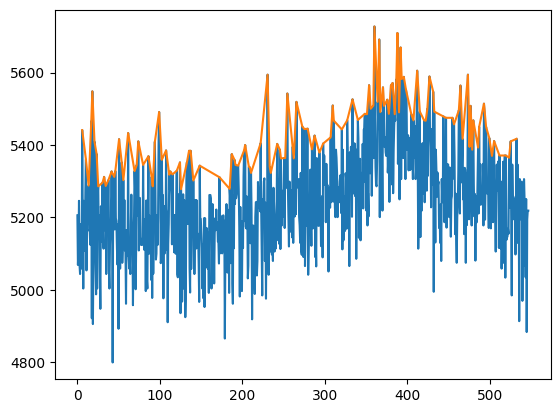

In [ ]:
plot_peaks("53,56.csv", 100, 100)

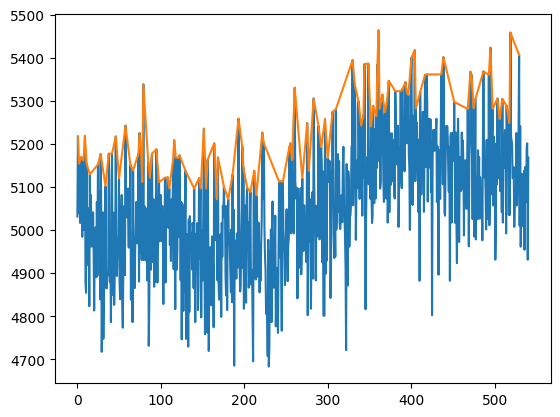

In [ ]:
plot_peaks("54,45.csv", 100, 100)

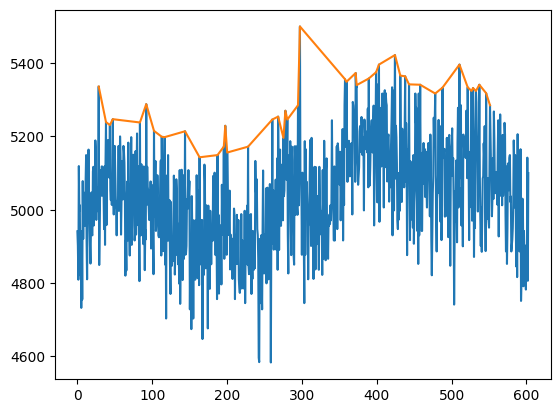

In [ ]:
plot_peaks("55,57.csv", 200, 100)

Text(0, 0.5, 'Intensity (AU)')

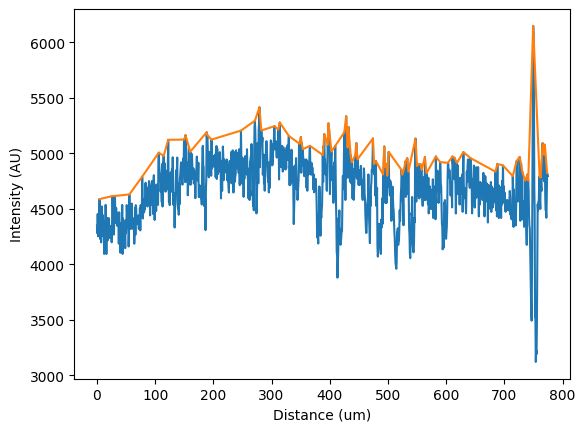

In [ ]:
plot_peaks("60,39A.csv", 220, 50)
plt.xlabel("Distance (um)")
plt.ylabel("Intensity (AU)")

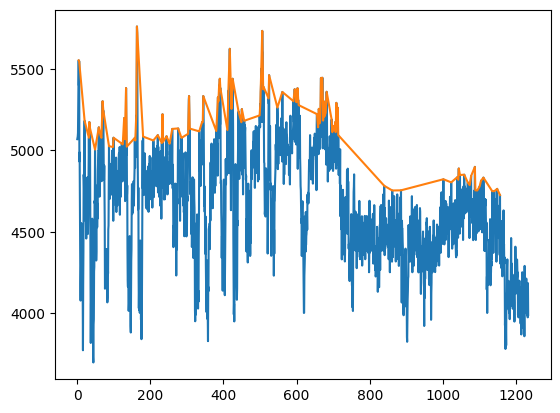

In [ ]:
plot_peaks("61,41A.csv", 300, 200)

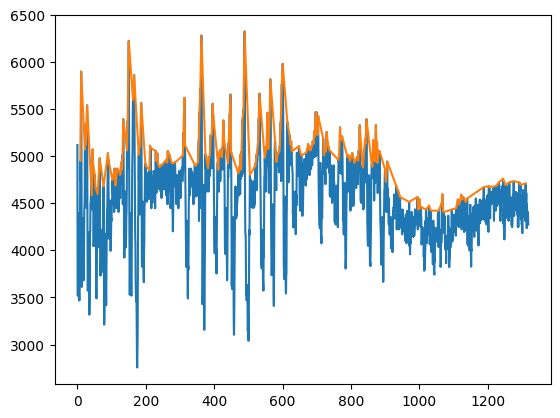

In [ ]:
plot_peaks("62,59.csv", 200, 100)

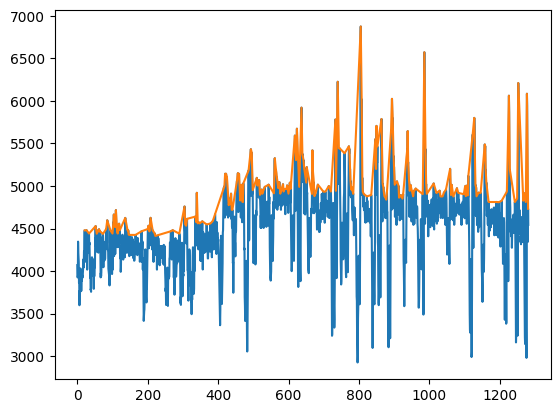

In [ ]:
plot_peaks("63,18.csv", 200, 200)

Text(0, 0.5, 'Intensity (AU)')

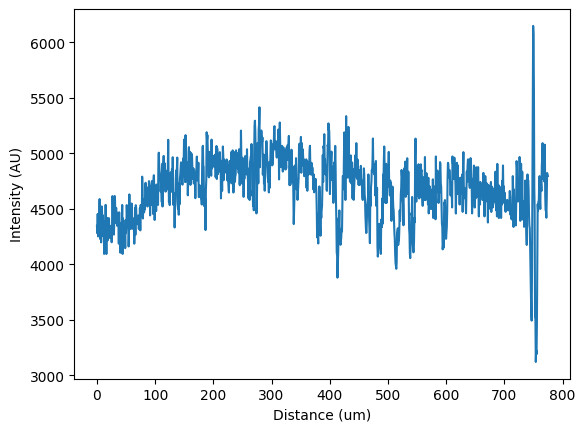

In [ ]:
sample1 = pd.read_csv("60,39A.csv")
plt.plot(sample1['X'], sample1['Y'])
plt.xlabel("Distance (um)")
plt.ylabel("Intensity (AU)")
